2025-05-13 20:40:12.270526: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-13 20:40:12.283969: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-13 20:40:12.327755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747161612.400618  722205 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747161612.418603  722205 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-13 20:40:12.477667: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins


Nombre optimal de topics (textes): 4


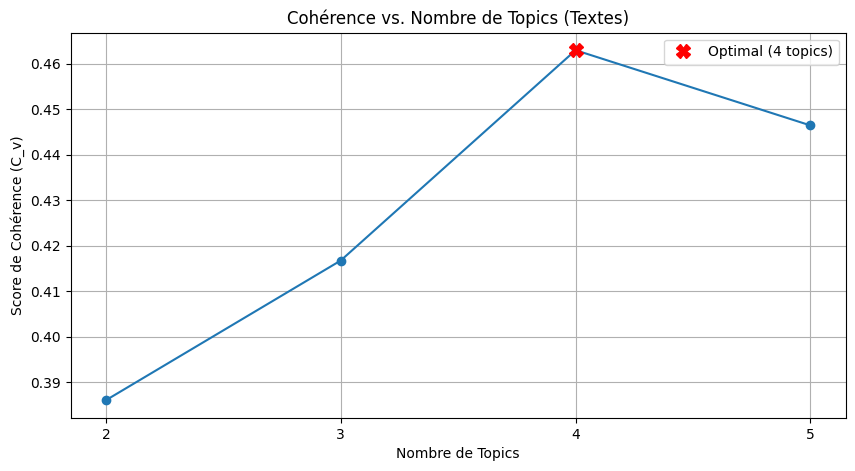

--- Attention : Utilisation de CountVectorizer avec LDA ---


2025-05-13 20:46:38,236 : INFO : Modèle LDA, CV, et feature names (textes) sauvegardés.
2025-05-13 20:46:38,250 : INFO : DTM et Topic Vectors (textes) sauvegardés.


LDA Topics (Scikit-learn - Textes):
Topic 0:
get one would like time bad say take make customer place even service know tell
Topic 1:
food good order like place get chicken taste eat really bad service cheese time come
Topic 2:
get food come order table wait time take service one place say room bar sit
Topic 3:
get tell say time would back pizza call car take day service never come give


2025-05-13 20:46:41,673 : INFO : Wordclouds sauvegardés dans model_outputs/lda_wordclouds.png


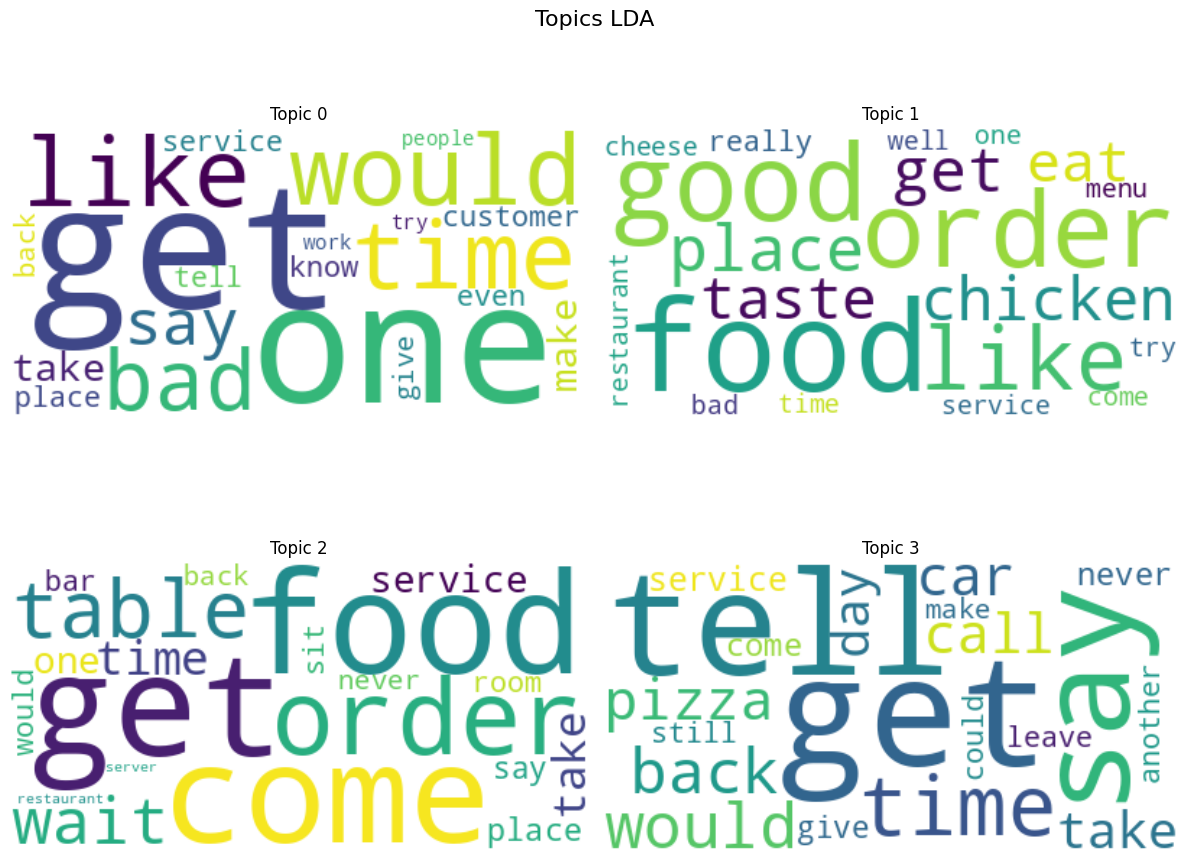

2025-05-13 20:46:56,963 : INFO : Visualisation pyLDAvis (textes) sauvegardée.
2025-05-13 20:47:50,090 : INFO : Plot t-SNE LDA sauvegardé dans model_outputs/lda_tsne_plot.html


2025-05-13 20:47:50,392 : INFO : Dominant topics (textes) sauvegardés.


Topic majoritaire: Sujet 0 avec 1583 documents.


2025-05-13 20:50:03,939 : INFO : Pipeline de traitement de texte sauvegardé.
/home/epikaizo/Documents/OpenClassrooms/projet6_Classez_et_segmentez_des_données_visuelles/openproj6/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning:

This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.




Prédiction topic pour texte : 'This is a wonderful product, I love the color and the fabric is soft.'
Distribution probabilité : [0.31090994 0.57325999 0.04238399 0.07344608]
Numéro topic prédit (0 à 3) : 1

--- Mots clés par topic (pipeline) ---
Topic 0: get, one, would, like, time, bad, say
Topic 1: food, good, order, like, place, get, chicken
Topic 2: get, food, come, order, table, wait, time
Topic 3: get, tell, say, time, would, back, pizza

1. Chargement et préparation des données images...


/tmp/ipykernel_722205/2883042073.py:507: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

2025-05-13 20:50:07,496 : INFO : DataFrame 'image_data_subsampled.pkl' sauvegardé.
2025-05-13 20:50:07.520623: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Nb échantillons images après sous-échantillonnage: 2500
Distribution classes images:
label
drink      500
food       500
inside     500
menu       500
outside    500
Name: count, dtype: int64

2. Extraction des caractéristiques images avec EfficientNetB0...


Extraction Features Images:  30%|███       | 759/2500 [04:50<10:03,  2.88it/s]

Avertissement : Image data/photos/l_rMdwgrvjm2PyHyXBcBTw.jpg (ID: l_rMdwgrvjm2PyHyXBcBTw) non chargée, ignorée.


Extraction Features Images: 100%|██████████| 2500/2500 [18:03<00:00,  2.31it/s]
2025-05-13 21:08:16,946 : INFO : Features et labels images (NumPy) sauvegardés.
2025-05-13 21:08:16,952 : INFO : LabelEncoder images sauvegardé.



2499 caractéristiques images extraites.
Mappage étiquettes images: {0: 'drink', 1: 'food', 2: 'inside', 3: 'menu', 4: 'outside'}

3. Réduction dimensionnalité t-SNE images...


2025-05-13 21:08:52,798 : INFO : Visualisation t-SNE images sauvegardée.
2025-05-13 21:08:52,910 : INFO : Données train/test images sauvegardées.



4. Apprentissage classifieur Random Forest images...
Variance expliquée PCA images: 0.25


2025-05-13 21:09:49,903 : INFO : Modèles images (scaler, pca, rf) sauvegardés.


Score classifieur images: 0.9107
Topic prédit pour image 'data/photos/dummy_new_image.jpg': drink

Script terminé.


In [1]:
# Standard Library Imports
import json
import csv
import os
import random
import re
import logging

# Third-party Imports
import numpy as np
import pandas as pd
import nltk
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
from matplotlib import offsetbox
from collections import Counter

from nltk import pos_tag
from nltk.corpus import stopwords, wordnet, words
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.cluster import KMeans, MiniBatchKMeans # Not used in the final flow
from sklearn.metrics import adjusted_rand_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input as tf_preprocess_input # Alias to avoid conflict
from tensorflow.keras.preprocessing.image import img_to_array

from wordcloud import WordCloud
# from yellowbrick.text import PosTagVisualizer # Not used in the final flow

import gensim
from gensim.models import CoherenceModel
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.lda_model
import joblib
from joblib import dump, load  # Import pour la sauvegarde et le chargement des modèles
from tqdm import tqdm  # Pour les barres de progression

# --- NLTK Resource Downloads ---
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
nltk.download('words')
nltk.download('punkt')

# --- Global Variables and Setup ---
logging.basicConfig(
    format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO
)

english_words = set(words.words())
GLOBAL_STOP_WORDS = set(stopwords.words("english"))
GLOBAL_LEMMATIZER = WordNetLemmatizer()
pyLDAvis.enable_notebook() # Only if in a Jupyter Notebook environment

# --- Output Directory ---
OUTPUT_DIR = "model_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)
logging.info(f"Répertoire de sortie '{OUTPUT_DIR}' créé ou déjà existant.")

# =============================
# Définition des Fonctions
# =============================
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(
    text: str,
    custom_english_words: set = english_words,
    min_len_word: int = 3,
    rejoin: bool = False
):
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()
    text = re.sub("[^a-z]", " ", text)
    tokens = text.split()
    processed_tokens = []
    for word, pos_tag_val in pos_tag(tokens):
        if word not in GLOBAL_STOP_WORDS and (not custom_english_words or word in custom_english_words):
            lemma = GLOBAL_LEMMATIZER.lemmatize(word, get_wordnet_pos(pos_tag_val))
            if len(lemma) >= min_len_word:
                processed_tokens.append(lemma)
    if rejoin:
        return " ".join(processed_tokens)
    return processed_tokens

def clean_dataset(doc):
    return preprocess_text(doc, custom_english_words=english_words, rejoin=True)

def topic_modeling_lda(reviews, num_topics):
    print("--- Attention : Utilisation de CountVectorizer avec LDA ---")
    vectorizer = CountVectorizer(
        max_df=0.95, min_df=1, max_features=1000, stop_words=None
    )
    if not reviews:
        logging.warning("La liste 'reviews' est vide. LDA ne peut pas être entraîné.")
        return None, vectorizer, np.array([]), None
    count_matrix = vectorizer.fit_transform(reviews)
    if num_topics <= 0:
        logging.error(f"num_topics doit être > 0. Reçu : {num_topics}")
        return None, vectorizer, np.array([]), count_matrix
    lda_model = LatentDirichletAllocation(
        n_components=num_topics,
        learning_method="online",
        random_state=0,
        max_iter=10,
    )
    if count_matrix.shape[0] == 0 or count_matrix.shape[1] == 0:
        print("Attention : La matrice CountVectorizer est vide. LDA ne peut pas être entraîné.")
        return None, vectorizer, np.array([]), count_matrix
    lda_model.fit(count_matrix)
    topic_vectors = lda_model.transform(count_matrix)
    return lda_model, vectorizer, topic_vectors, count_matrix

def display_topics(model, vectorizer, no_top_words=15):
    if model is None or not hasattr(model, 'components_'):
        logging.warning("Modèle LDA non valide ou non entraîné fourni à display_topics.")
        return []
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        top_words_indices = topic.argsort()[: -no_top_words - 1 : -1]
        print(" ".join([feature_names[i] for i in top_words_indices]))
    return list(feature_names)

def get_Cv_gensim(model, texts, dictionary, coherence_type="c_v"):
    if not texts or not dictionary or not model:
        logging.error("Modèle, Textes ou Dictionnaire manquant pour le calcul de cohérence.")
        return None
    try:
        coherence_model = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence=coherence_type
        )
        return coherence_model.get_coherence()
    except Exception as e:
        logging.error(f"Erreur calcul cohérence ({coherence_type}) dans get_Cv_gensim: {e}")
        return None

def find_optimal_number_of_topics(
    dictionary, corpus, texts, limit, start=2, step=3,
    random_state=100, passes=10, iterations=50, chunksize=100,
):
    coherence_values = []
    model_list = []
    topic_numbers = list(range(start, limit, step))
    if not topic_numbers:
        logging.warning(f"Plage de topics (start={start}, limit={limit}, step={step}) est vide.")
        return None, {}
    logging.info(f"Calcul cohérence pour {len(topic_numbers)} modèles (topics de {start} à {limit-1} par pas de {step})...")
    for num_topics_iter in topic_numbers: # Renamed num_topics to avoid conflict
        try:
            model = gensim.models.ldamodel.LdaModel(
                corpus=corpus, id2word=dictionary, num_topics=num_topics_iter,
                random_state=random_state, update_every=1, chunksize=chunksize,
                passes=passes, iterations=iterations, alpha="auto", eta="auto",
                per_word_topics=True,
            )
            model_list.append(model)
            coherence = get_Cv_gensim(model=model, texts=texts, dictionary=dictionary)
            if coherence is not None:
                coherence_values.append(coherence)
                logging.info(f"Topics = {num_topics_iter} -> Cohérence = {coherence:.4f}")
            else:
                logging.warning(f"get_Cv_gensim a retourné None pour {num_topics_iter} topics.")
                coherence_values.append(None)
        except Exception as e:
            logging.error(f"Erreur entraînement/cohérence pour {num_topics_iter} topics: {e}")
            coherence_values.append(None)
    valid_scores = [(topic_numbers[i], score) for i, score in enumerate(coherence_values) if score is not None]
    if not valid_scores:
        logging.warning("Aucun score de cohérence calculé avec succès.")
        return None, {}
    optimal_num_topics, max_coherence = max(valid_scores, key=lambda item: item[1])
    coherence_scores_dict = dict(valid_scores)
    logging.info(f"Optimal topics: {optimal_num_topics} (Cohérence = {max_coherence:.4f})")
    return optimal_num_topics, coherence_scores_dict

def plot_wordcloud(lda_model, lda_features_names, num_topics_to_plot): # Renamed num_topics
    if lda_model is None or num_topics_to_plot <= 0:
        logging.warning("Modèle LDA non valide ou num_topics <= 0 pour plot_wordcloud.")
        return
    nrows = (num_topics_to_plot + 1) // 2
    fig, axes = plt.subplots(nrows, 2, figsize=(12, nrows * 5), squeeze=False)
    axes = axes.flatten()
    for i in range(num_topics_to_plot):
        topic_words_dist = lda_model.components_[i]
        top_word_indices = topic_words_dist.argsort()[:-21:-1]
        wc_dict = {lda_features_names[index]: topic_words_dist[index] for index in top_word_indices}
        wc = WordCloud(background_color="white", width=400, height=200)
        wc.generate_from_frequencies(wc_dict)
        axes[i].set_title(f"Topic {i}")
        axes[i].imshow(wc, interpolation="bilinear")
        axes[i].axis("off")
    for j in range(num_topics_to_plot, len(axes)):
        axes[j].axis("off")
    plt.tight_layout()
    plt.suptitle("Topics LDA", fontsize=16)
    plt.savefig(os.path.join(OUTPUT_DIR, "lda_wordclouds.png"))
    logging.info(f"Wordclouds sauvegardés dans {OUTPUT_DIR}/lda_wordclouds.png")
    plt.show()

def plot_tsne(topic_vectors, num_topics_to_plot): # Renamed num_topics
    if topic_vectors is None or topic_vectors.shape[0] == 0 or num_topics_to_plot <= 0:
        logging.warning("Vecteurs de topics invalides ou num_topics <= 0 pour plot_tsne.")
        return None
    dominant_topics_arr = np.argmax(topic_vectors, axis=1)
    perplexity_val = min(30, topic_vectors.shape[0] - 1) if topic_vectors.shape[0] > 1 else 5
    tsne_model = TSNE(n_components=2, random_state=0, perplexity=perplexity_val, init='pca')
    tsne_vectors = tsne_model.fit_transform(topic_vectors)
    df = pd.DataFrame(tsne_vectors, columns=["x", "y"])
    df["dominant_topic"] = dominant_topics_arr.astype(str)
    colors = px.colors.qualitative.Set1
    color_map = {str(i): colors[i % len(colors)] for i in range(num_topics_to_plot)}
    fig = px.scatter(
        df, x="x", y="y", color="dominant_topic", color_discrete_map=color_map,
        title="Visualisation t-SNE des sujets LDA", labels={"dominant_topic": "Sujet Dominant"},
        hover_name=df.index, template="plotly_white",
    )
    fig.update_traces(marker=dict(size=6, opacity=0.7), selector=dict(mode="markers"))
    fig.update_layout(legend_title_text="Topics")
    fig.write_html(os.path.join(OUTPUT_DIR, "lda_tsne_plot.html"))
    logging.info(f"Plot t-SNE LDA sauvegardé dans {OUTPUT_DIR}/lda_tsne_plot.html")
    fig.show()
    return dominant_topics_arr

def count_maj_topic(dominant_topics_arr): # Renamed
    if dominant_topics_arr is None or len(dominant_topics_arr) == 0:
        logging.warning("Tableau dominant_topics vide ou None.")
        return
    topic_counts = Counter(dominant_topics_arr)
    if not topic_counts:
        logging.warning("Aucun topic trouvé dans dominant_topics.")
        return
    major_topic = topic_counts.most_common(1)[0]
    print(f"Topic majoritaire: Sujet {major_topic[0]} avec {major_topic[1]} documents.")

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, english_words_set, min_len_word=3, rejoin=True): # Renamed
        self.english_words_set = english_words_set
        self.min_len_word = min_len_word
        self.rejoin = rejoin
    def fit(self, X, y=None): return self
    def transform(self, X):
        return [
            preprocess_text(doc, self.english_words_set, self.min_len_word, self.rejoin)
            for doc in X
        ]

class TopicModeler(BaseEstimator, TransformerMixin):
    def __init__(self, num_topics_model=4): # Renamed num_topics
        self.num_topics_model = num_topics_model
        self.count_vectorizer = CountVectorizer(max_df=0.95, min_df=1, max_features=1000, stop_words=None)
        self.lda_model = LatentDirichletAllocation(learning_method="online", random_state=0, max_iter=10)
        self.topic_vectors = None
        self.dtm = None
    def fit(self, X, y=None):
        self.count_vectorizer.fit(X)
        self.dtm = self.count_vectorizer.transform(X)
        self.lda_model.n_components = self.num_topics_model
        if self.dtm.shape[0] > 0 and self.dtm.shape[1] > 0:
            self.lda_model.fit(self.dtm)
            self.topic_vectors = self.lda_model.transform(self.dtm)
        else:
            logging.warning("DTM vide dans TopicModeler.fit(). LDA non entraîné.")
            self.topic_vectors = np.array([])
        return self
    def transform(self, X):
        if not hasattr(self.lda_model, 'components_') or self.lda_model.components_ is None:
             logging.warning("Modèle LDA dans TopicModeler non entraîné. Transform retourne array vide.")
             return np.array([])
        dtm_new = self.count_vectorizer.transform(X)
        return self.lda_model.transform(dtm_new)

# =============================
# Chargement des données Textuelles
# =============================
DATA_FILE_PATH = "negative_reviews5000.csv"
try:
    negative_reviews_df = pd.read_csv(DATA_FILE_PATH)
except FileNotFoundError:
    logging.error(f"Fichier de données '{DATA_FILE_PATH}' non trouvé. Arrêt.")
    exit()

logging.info("Nettoyage du texte des critiques...")
negative_reviews_df["cleaned_text_list"] = negative_reviews_df["text"].apply(
    lambda x: preprocess_text(x, custom_english_words=english_words, min_len_word=3, rejoin=False)
)
negative_reviews_df["cleaned_text_str"] = negative_reviews_df["cleaned_text_list"].apply(lambda x: " ".join(x))
negative_reviews_df = negative_reviews_df[negative_reviews_df["cleaned_text_str"].str.strip().astype(bool)]
logging.info(f"Nombre de critiques après nettoyage: {len(negative_reviews_df)}")
negative_reviews_df.to_pickle(os.path.join(OUTPUT_DIR, "text_negative_reviews_processed.pkl"))
logging.info(f"DataFrame 'text_negative_reviews_processed.pkl' sauvegardé.")

# =============================
# Modélisation des sujets (LDA) Textes
# =============================
tokenized_texts_for_gensim = negative_reviews_df["cleaned_text_list"].tolist()
dictionary_gensim = gensim.corpora.Dictionary(tokenized_texts_for_gensim) # Renamed
corpus_gensim_bow = [dictionary_gensim.doc2bow(text) for text in tokenized_texts_for_gensim] # Renamed
dump(dictionary_gensim, os.path.join(OUTPUT_DIR, "text_gensim_dictionary.joblib"))
dump(corpus_gensim_bow, os.path.join(OUTPUT_DIR, "text_gensim_corpus_bow.joblib"))
logging.info(f"Dictionnaire et corpus Gensim (textes) sauvegardés.")

start_topics = 2
limit_topics = 6
step_topics = 1
num_topics = 4 # Default
optimal_topics, coherence_scores = find_optimal_number_of_topics(
    dictionary=dictionary_gensim, corpus=corpus_gensim_bow, texts=tokenized_texts_for_gensim,
    limit=limit_topics, start=start_topics, step=step_topics, passes=5, iterations=30,
)

if optimal_topics is not None:
    num_topics = optimal_topics
    print(f"\nNombre optimal de topics (textes): {optimal_topics}")
    dump(coherence_scores, os.path.join(OUTPUT_DIR, "text_gensim_coherence_scores.joblib"))
    logging.info(f"Scores de cohérence Gensim (textes) sauvegardés.")
    # Plotting coherence
    x_plot = list(coherence_scores.keys())
    y_plot = list(coherence_scores.values())
    plt.figure(figsize=(10,5))
    plt.plot(x_plot, y_plot, marker='o')
    plt.xlabel("Nombre de Topics"); plt.ylabel("Score de Cohérence (C_v)")
    plt.title("Cohérence vs. Nombre de Topics (Textes)"); plt.xticks(x_plot); plt.grid(True)
    if optimal_topics in coherence_scores:
        plt.plot(optimal_topics, coherence_scores[optimal_topics], marker="X", color="red", markersize=10, linestyle="None", label=f"Optimal ({optimal_topics} topics)")
    plt.legend()
    plt.savefig(os.path.join(OUTPUT_DIR, "text_gensim_coherence_plot.png"))
    plt.show()
else:
    logging.warning(f"Impossible de déterminer optimal_topics (textes). Utilisation de défaut: {num_topics}")

preprocessed_reviews_str_list = negative_reviews_df["cleaned_text_str"].tolist()
lda_model, count_vectorizer, topic_vectors, dtm = topic_modeling_lda(
    preprocessed_reviews_str_list, num_topics=num_topics
)

if lda_model and count_vectorizer:
    print("LDA Topics (Scikit-learn - Textes):")
    lda_features_names_all = display_topics(lda_model, count_vectorizer)
    dump(lda_model, os.path.join(OUTPUT_DIR, "text_sklearn_lda_model.joblib"))
    dump(count_vectorizer, os.path.join(OUTPUT_DIR, "text_sklearn_count_vectorizer.joblib"))
    if lda_features_names_all: # Check if not empty
        dump(lda_features_names_all, os.path.join(OUTPUT_DIR, "text_sklearn_lda_feature_names.joblib"))
    logging.info(f"Modèle LDA, CV, et feature names (textes) sauvegardés.")
else:
    logging.error("Entraînement LDA Scikit-learn (textes) a échoué.")

# =============================
# Visualisation Textes
# =============================
if lda_model and count_vectorizer and dtm is not None and topic_vectors is not None:
    dump(dtm, os.path.join(OUTPUT_DIR, "text_sklearn_dtm.joblib"))
    dump(topic_vectors, os.path.join(OUTPUT_DIR, "text_sklearn_topic_vectors.joblib"))
    logging.info(f"DTM et Topic Vectors (textes) sauvegardés.")
    plot_wordcloud(lda_model, count_vectorizer.get_feature_names_out(), num_topics)
    try:
        pyLDAvis_data = pyLDAvis.lda_model.prepare(lda_model, dtm, count_vectorizer, mds="mmds")
        pyLDAvis.save_html(pyLDAvis_data, os.path.join(OUTPUT_DIR, 'text_lda_visualization.html'))
        logging.info(f"Visualisation pyLDAvis (textes) sauvegardée.")
    except Exception as e_pyldavis:
        logging.warning(f"Erreur préparation pyLDAvis (textes): {e_pyldavis}")
    dominant_topics = plot_tsne(topic_vectors, num_topics)
    if dominant_topics is not None:
        dump(dominant_topics, os.path.join(OUTPUT_DIR, "text_sklearn_dominant_topics.joblib"))
        logging.info(f"Dominant topics (textes) sauvegardés.")
        count_maj_topic(dominant_topics)

# =============================
# Pipeline et Prédiction Textes
# =============================
text_pipeline = None # Initialize
if not negative_reviews_df.empty:
    text_pipeline = Pipeline([
        ("preprocessing", TextPreprocessor(english_words_set=english_words, min_len_word=3, rejoin=True)),
        ("topic_modeling", TopicModeler(num_topics_model=num_topics)),
    ])
    text_pipeline.fit(negative_reviews_df["text"])
    dump(text_pipeline, os.path.join(OUTPUT_DIR, "text_processing_pipeline.joblib"))
    logging.info(f"Pipeline de traitement de texte sauvegardé.")
else:
    logging.warning("DataFrame negative_reviews_df vide. Pipeline texte non entraîné.")

def topic_predict(texte_unique_raw, text_pipeline_obj):
    if text_pipeline_obj is None:
        logging.error("Objet text_pipeline_obj est None. Prédiction impossible.")
        return
    topic_modeler_step = text_pipeline_obj.named_steps.get("topic_modeling")
    if not topic_modeler_step or not hasattr(topic_modeler_step, "lda_model") or \
       not hasattr(topic_modeler_step.lda_model, 'components_') or \
       topic_modeler_step.lda_model.components_ is None:
        logging.error("Pipeline texte (TopicModeler) non entraîné. Prédiction impossible.")
        return
    print(f"\nPrédiction topic pour texte : '{texte_unique_raw}'")
    try:
        topic_distribution = text_pipeline_obj.transform([texte_unique_raw])
        if topic_distribution.ndim == 0 or topic_distribution.size == 0:
            logging.error("Transformation pipeline n'a pas retourné de distribution valide.")
            return
        numero_topic_predit = np.argmax(topic_distribution, axis=1)[0]
        print(f"Distribution probabilité : {topic_distribution[0]}")
        print(f"Numéro topic prédit (0 à {topic_modeler_step.num_topics_model-1}) : {numero_topic_predit}")
        vectorizer_in_pipeline = topic_modeler_step.count_vectorizer
        lda_model_in_pipeline = topic_modeler_step.lda_model
        if hasattr(vectorizer_in_pipeline, 'get_feature_names_out') and hasattr(lda_model_in_pipeline, 'components_'):
            feature_names_in_pipeline = vectorizer_in_pipeline.get_feature_names_out()
            print("\n--- Mots clés par topic (pipeline) ---")
            n_top_words = 7
            for topic_idx, topic_loadings in enumerate(lda_model_in_pipeline.components_):
                top_words_indices = topic_loadings.argsort()[:-n_top_words - 1 : -1]
                top_words = [feature_names_in_pipeline[i] for i in top_words_indices]
                print(f"Topic {topic_idx}: {', '.join(top_words)}")
    except Exception as e:
        print(f"Erreur pendant transformation/prédiction texte : {e}")

if text_pipeline is not None:
    example_text_to_predict = "This is a wonderful product, I love the color and the fabric is soft."
    topic_predict(example_text_to_predict, text_pipeline_obj=text_pipeline)
else:
    logging.warning("Pipeline texte non entraîné, exemple de prédiction texte ignoré.")

# ============ Images ====================================
# --- Constantes de configuration Images ---
PHOTOS_JSON_PATH = os.path.join('data', 'photos.json')
PHOTOS_DIR_PATH = os.path.join('data', 'photos')
N_SAMPLES_PER_CLASS = 500
TARGET_COLUMN = 'label'
EFFICIENTNET_INPUT_SIZE = (224, 224)
PCA_N_COMPONENTS_IMG = 10 # Renamed
TEST_SIZE_SPLIT_IMG = 0.3 # Renamed
RANDOM_STATE_GLOBAL = 42

SCALER_IMG_PATH = 'image_scaler.joblib' # Renamed
PCA_IMG_PATH = 'image_pca.joblib' # Renamed
MODEL_IMG_PATH = 'image_random_forest_model.joblib' # Renamed
LABEL_ENCODER_IMG_PATH = 'image_label_encoder.joblib' # Renamed
TSNE_PLOT_IMAGE_PATH = 'image_tsne_visualization.png'

# --- Chargement et préparation des données Images ---
print("\n1. Chargement et préparation des données images...")
def load_data_from_jsonl(file_path):
    data_list = []
    try:
        with open(file_path, 'r') as f:
            for line in f: data_list.append(json.loads(line))
    except FileNotFoundError:
        print(f"Erreur : Fichier {file_path} non trouvé.")
        return pd.DataFrame()
    return pd.DataFrame(data_list)

df_full_img = load_data_from_jsonl(PHOTOS_JSON_PATH) # Renamed

# Initialize image processing variables to None
subsampled_df_img = pd.DataFrame()
features_X_np_img = np.array([])
labels_y_np_img = np.array([])
label_encoder_img = None
labels_y_for_model_img = np.array([])
feature_extractor_img = None
scaler_img = None
pca_img = None
best_rf_model_img = None
processed_photo_ids_img = []


if df_full_img.empty:
    print("Aucune donnée image chargée. Partie image ignorée.")
elif TARGET_COLUMN not in df_full_img.columns:
    logging.error(f"Colonne cible '{TARGET_COLUMN}' non présente dans données images. Partie image ignorée.")
else:
    def stratified_sample_df(df: pd.DataFrame, col: str, n_samples: int) -> pd.DataFrame:
        class_counts = df[col].value_counts()
        if class_counts.empty:
            logging.warning(f"Colonne '{col}' vide pour échantillonnage stratifié.")
            return pd.DataFrame(columns=df.columns)
        min_samples_in_any_class = class_counts.min()
        actual_n_samples = min(n_samples, min_samples_in_any_class if min_samples_in_any_class > 0 else n_samples)
        if actual_n_samples < n_samples:
            logging.warning(f"Nb échantillons demandé ({n_samples}) > dispo ({min_samples_in_any_class}). Utilisation de {actual_n_samples}.")
        if actual_n_samples == 0:
            logging.warning("actual_n_samples is 0, returning empty DataFrame.")
            return pd.DataFrame(columns=df.columns)
        return df.groupby(col, group_keys=False).apply(
            lambda x: x.sample(n=actual_n_samples, random_state=RANDOM_STATE_GLOBAL, replace=False)
        ).reset_index(drop=True)

    subsampled_df_img = stratified_sample_df(df_full_img, TARGET_COLUMN, N_SAMPLES_PER_CLASS) # Renamed
    print(f"Nb échantillons images après sous-échantillonnage: {len(subsampled_df_img)}")
    if not subsampled_df_img.empty:
        print(f"Distribution classes images:\n{subsampled_df_img[TARGET_COLUMN].value_counts()}")
        subsampled_df_img.to_pickle(os.path.join(OUTPUT_DIR, "image_data_subsampled.pkl"))
        logging.info(f"DataFrame 'image_data_subsampled.pkl' sauvegardé.")

    if not subsampled_df_img.empty:
        print("\n2. Extraction des caractéristiques images avec EfficientNetB0...")
        feature_extractor_img = EfficientNetB0(include_top=False, weights='imagenet', pooling='avg') # Renamed
        processed_features_X_img = [] # Renamed
        processed_labels_y_img = [] # Renamed

        for index, row in tqdm(subsampled_df_img.iterrows(), total=subsampled_df_img.shape[0], desc="Extraction Features Images"):
            photo_id = row['photo_id']
            label = row[TARGET_COLUMN]
            image_path = os.path.join(PHOTOS_DIR_PATH, photo_id + '.jpg')
            image_array = cv2.imread(image_path)
            if image_array is None:
                print(f"Avertissement : Image {image_path} (ID: {photo_id}) non chargée, ignorée.")
                continue
            try:
                img_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
                img_resized = cv2.resize(img_rgb, EFFICIENTNET_INPUT_SIZE)
                img_expanded = np.expand_dims(img_resized, axis=0)
                img_preprocessed = tf_preprocess_input(img_expanded)
                feature_vector = feature_extractor_img.predict(img_preprocessed, verbose=0)[0]
                processed_photo_ids_img.append(photo_id)
                processed_features_X_img.append(feature_vector)
                processed_labels_y_img.append(label)
            except Exception as e:
                print(f"Erreur extraction features pour {photo_id}: {e}. Image ignorée.")
        
        if not processed_features_X_img:
            print("Erreur critique : Aucune caractéristique image extraite.")
        else:
            features_X_np_img = np.stack(processed_features_X_img) # Renamed
            labels_y_np_img = np.array(processed_labels_y_img) # Renamed
            print(f"\n{len(features_X_np_img)} caractéristiques images extraites.")
            dump(features_X_np_img, os.path.join(OUTPUT_DIR, "image_features_X_np.joblib"))
            dump(labels_y_np_img, os.path.join(OUTPUT_DIR, "image_labels_y_np_original.joblib"))
            logging.info(f"Features et labels images (NumPy) sauvegardés.")

            if labels_y_np_img.ndim > 0 and labels_y_np_img.dtype.kind in ['O', 'S', 'U']:
                label_encoder_img = LabelEncoder() # Renamed
                labels_y_for_model_img = label_encoder_img.fit_transform(labels_y_np_img) # Renamed
                print(f"Mappage étiquettes images: {dict(enumerate(label_encoder_img.classes_))}")
                dump(label_encoder_img, os.path.join(OUTPUT_DIR, LABEL_ENCODER_IMG_PATH))
                logging.info(f"LabelEncoder images sauvegardé.")
            else:
                labels_y_for_model_img = labels_y_np_img

            if len(features_X_np_img) > 1:
                print("\n3. Réduction dimensionnalité t-SNE images...")
                perplexity_value_img = min(30, len(features_X_np_img) - 1) # Renamed
                tsne_img_model = TSNE(n_components=2, init='pca', random_state=RANDOM_STATE_GLOBAL, perplexity=perplexity_value_img) # Renamed
                X_tsne_img = tsne_img_model.fit_transform(features_X_np_img) # Renamed
                plt.figure(figsize=(10, 8))
                sns.scatterplot(x=X_tsne_img[:, 0], y=X_tsne_img[:, 1], hue=labels_y_np_img, palette="viridis")
                plt.title('t-SNE caractéristiques images'); plt.xlabel('t-SNE Comp 1'); plt.ylabel('t-SNE Comp 2')
                plt.legend(title=TARGET_COLUMN)
                plt.savefig(os.path.join(OUTPUT_DIR, TSNE_PLOT_IMAGE_PATH))
                plt.close()
                logging.info(f"Visualisation t-SNE images sauvegardée.")
            
            if len(features_X_np_img) > 1 and len(labels_y_for_model_img) > 1 :
                print("\n4. Apprentissage classifieur Random Forest images...")
                X_train_img, X_test_img, y_train_img, y_test_img = train_test_split( # Renamed
                    features_X_np_img, labels_y_for_model_img, test_size=TEST_SIZE_SPLIT_IMG,
                    random_state=RANDOM_STATE_GLOBAL, stratify=labels_y_for_model_img
                )
                dump(X_train_img, os.path.join(OUTPUT_DIR, "image_X_train.joblib"))
                dump(X_test_img, os.path.join(OUTPUT_DIR, "image_X_test.joblib"))
                dump(y_train_img, os.path.join(OUTPUT_DIR, "image_y_train.joblib"))
                dump(y_test_img, os.path.join(OUTPUT_DIR, "image_y_test.joblib"))
                logging.info(f"Données train/test images sauvegardées.")

                scaler_img = StandardScaler() # Renamed
                X_train_std_img = scaler_img.fit_transform(X_train_img) # Renamed
                X_test_std_img = scaler_img.transform(X_test_img) # Renamed

                actual_pca_n_comp_img = min(PCA_N_COMPONENTS_IMG, X_train_std_img.shape[1], X_train_std_img.shape[0]) # Renamed
                if actual_pca_n_comp_img < 1: actual_pca_n_comp_img = 1
                
                pca_img = PCA(n_components=actual_pca_n_comp_img, random_state=RANDOM_STATE_GLOBAL) # Renamed
                X_train_pca_img = pca_img.fit_transform(X_train_std_img) # Renamed
                X_test_pca_img = pca_img.transform(X_test_std_img) # Renamed
                print(f"Variance expliquée PCA images: {np.sum(pca_img.explained_variance_ratio_):.2f}")

                params_rf_img = {'max_depth': range(5,15,3), 'n_estimators': [50,100,150]} # Adjusted range
                rf_clf_model_img = RandomForestClassifier(random_state=RANDOM_STATE_GLOBAL) # Renamed
                cv_folds_img = 3 # Renamed
                if len(np.unique(y_train_img)) > 1 and len(y_train_img) > 0:
                    min_samples_class_train_img = np.min(np.bincount(y_train_img)) if len(y_train_img) > 0 else cv_folds_img # Renamed
                    cv_folds_img = min(cv_folds_img, min_samples_class_train_img)
                if cv_folds_img < 2: cv_folds_img = 2
                if X_train_pca_img.shape[0] < cv_folds_img : cv_folds_img = max(2, X_train_pca_img.shape[0])
                
                grid_search_clf_img = GridSearchCV(rf_clf_model_img, params_rf_img, cv=cv_folds_img, scoring='accuracy', error_score='raise') # Renamed
                try:
                    grid_search_clf_img.fit(X_train_pca_img, y_train_img)
                    best_rf_model_img = grid_search_clf_img.best_estimator_ # Renamed
                    score_img = best_rf_model_img.score(X_test_pca_img, y_test_img) # Renamed
                    print(f"Score classifieur images: {score_img:.4f}")
                    dump(scaler_img, os.path.join(OUTPUT_DIR, SCALER_IMG_PATH))
                    dump(pca_img, os.path.join(OUTPUT_DIR, PCA_IMG_PATH))
                    dump(best_rf_model_img, os.path.join(OUTPUT_DIR, MODEL_IMG_PATH))
                    logging.info("Modèles images (scaler, pca, rf) sauvegardés.")
                except ValueError as e_grid:
                    logging.error(f"Erreur GridSearchCV images: {e_grid}.")

# --- Pipeline de Prédiction pour une Nouvelle Image ---
def predict_image_topic(image_path: str, feat_extractor, scaler, pca_transf, classifier, label_enc=None): # Renamed args
    if not all([feat_extractor, scaler, pca_transf, classifier]):
        logging.error("Composants pipeline prédiction image manquants.")
        return None
    try:
        img_arr = cv2.imread(image_path)
        if img_arr is None: print(f"Erreur chargement image: {image_path}"); return None
        img_rgb = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img_rgb, EFFICIENTNET_INPUT_SIZE)
        img_expanded = np.expand_dims(img_resized, axis=0)
        img_preprocessed = tf_preprocess_input(img_expanded)
        features_new = feat_extractor.predict(img_preprocessed, verbose=0)[0]
        features_new_reshaped = features_new.reshape(1, -1)
        features_new_std = scaler.transform(features_new_reshaped)
        features_new_pca = pca_transf.transform(features_new_std)
        pred_numeric = classifier.predict(features_new_pca)[0]
        if label_enc and hasattr(label_enc, 'classes_'):
            return label_enc.inverse_transform([pred_numeric])[0]
        return str(pred_numeric)
    except Exception as e:
        print(f"Erreur prédiction image {image_path}: {e}")
        return None

if best_rf_model_img is not None and scaler_img is not None and pca_img is not None and feature_extractor_img is not None:
    dummy_new_image_path = os.path.join(PHOTOS_DIR_PATH, "dummy_new_image.jpg")
    if not os.path.exists(PHOTOS_DIR_PATH): os.makedirs(PHOTOS_DIR_PATH, exist_ok=True)
    if not os.path.exists(dummy_new_image_path):
        if processed_photo_ids_img: # Check if list is populated
            try:
                first_img_path = os.path.join(PHOTOS_DIR_PATH, processed_photo_ids_img[0] + '.jpg')
                if os.path.exists(first_img_path):
                    import shutil
                    shutil.copy(first_img_path, dummy_new_image_path)
                    print(f"Image factice copiée pour test: {dummy_new_image_path}")
            except Exception as e_copy: print(f"Erreur copie image factice: {e_copy}")
        if not os.path.exists(dummy_new_image_path):
            cv2.imwrite(dummy_new_image_path, np.zeros((EFFICIENTNET_INPUT_SIZE[0], EFFICIENTNET_INPUT_SIZE[1], 3), dtype=np.uint8))
            print(f"Image factice noire créée pour test: {dummy_new_image_path}")
    if os.path.exists(dummy_new_image_path):
        predicted_topic_img = predict_image_topic(dummy_new_image_path,
                                              feature_extractor_img, scaler_img, pca_img,
                                              best_rf_model_img, label_enc=label_encoder_img)
        if predicted_topic_img is not None:
            print(f"Topic prédit pour image '{dummy_new_image_path}': {predicted_topic_img}")
else:
    logging.warning("Modèles/transformateurs image non dispo. Test prédiction image ignoré.")

print("\nScript terminé.")
